# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import hist
plt.style.use('seaborn')
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import itertools 
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures

from imblearn.pipeline import make_pipeline, Pipeline

# EDA

In [2]:
df_merge = pd.read_csv('merge_data.csv')
df_merge = df_merge.drop('Unnamed: 0', 1)
df_merge.head()

,publisher,author,isbn,date,title,weeks_on_list,no_of_words_title,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,average_rating
0,St. Martin's,Kristin Hannah,125016561X,2018-06-09,THE GREAT ALONE,16,3,151,243,48,363073,778639,36575,4.34
1,Ballantine,Jodi Picoult,034554496X,2017-02-12,SMALL GREAT THINGS,16,3,104,172,35,260815,533873,25170,4.34
2,Grand Central,Nicholas Sparks,1455520691,2017-02-05,TWO BY TWO,16,3,2015,8889,353,66630,163159,5816,3.92
3,Harper,Harper Lee,0062409875,2016-07-10,GO SET A WATCHMAN,16,4,54,96,17,229380,575055,29495,3.31
4,Scribner,Stephen King,1501175467,2017-12-10,IT,15,1,1333,2982,190,789789,1398689,25068,4.24


In [3]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   publisher                1215 non-null   object 
 1   author                   1215 non-null   object 
 2   isbn                     1215 non-null   object 
 3   date                     1215 non-null   object 
 4   title                    1215 non-null   object 
 5   weeks_on_list            1215 non-null   int64  
 6   no_of_words_title        1215 non-null   int64  
 7   ratings_count            1215 non-null   int64  
 8   reviews_count            1215 non-null   int64  
 9   text_reviews_count       1215 non-null   int64  
 10  work_ratings_count       1215 non-null   int64  
 11  work_reviews_count       1215 non-null   int64  
 12  work_text_reviews_count  1215 non-null   int64  
 13  average_rating           1215 non-null   float64
dtypes: float64(1), int64(8),

In [4]:
df_merge.describe()

,weeks_on_list,no_of_words_title,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,average_rating
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1.215000e+03,1215.000000,1215.000000
mean,1.360494,2.736626,3751.211523,7941.692181,390.095473,44806.940741,8.466811e+04,3447.869136,3.976741
std,2.317846,1.164310,11864.112871,24450.464957,1151.049818,91514.465811,1.574557e+05,5754.555105,0.251159
min,0.000000,1.000000,0.000000,0.000000,0.000000,45.000000,1.770000e+02,2.000000,3.060000
25%,0.000000,2.000000,21.000000,42.000000,5.000000,7042.000000,1.508450e+04,623.500000,3.820000
50%,1.000000,3.000000,80.000000,146.000000,18.000000,15924.000000,3.180500e+04,1404.000000,3.990000
75%,1.000000,3.000000,676.000000,1446.500000,104.000000,40904.000000,7.837450e+04,3397.500000,4.150000
max,16.000000,6.000000,105021.000000,184021.000000,9413.000000,886392.000000,1.398689e+06,47031.000000,4.610000


### Distribution of Review and Rating Counts

(array([  663.46032905,  1531.06229781,  5307.6826324 , 10513.29444495,
        14034.73772991, 13371.27740086,  8778.09050743,  4644.22230335,
         1990.38098715,   408.28327942]),
 array([-2.94918071, -2.34680521, -1.7444297 , -1.1420542 , -0.53967869,
         0.06269682,  0.66507232,  1.26744783,  1.86982334,  2.47219884,
         3.07457435]),
 <a list of 10 Patch objects>)

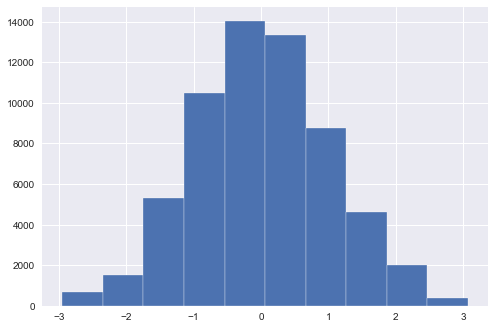

In [5]:
# Distribution of work_text_reviews_count
df = pd.DataFrame({'work_text_reviews_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.work_text_reviews_count, weights=df.weeks_on_list)

(array([   716.9735507 ,   8603.6826084 ,  39433.54528849,  98942.34999656,
        178526.41412423, 235167.32462951, 175658.51992144,  81734.98477977,
         32263.80978149,   9320.6561591 ]),
 array([-3.71786218, -3.03795688, -2.35805159, -1.67814629, -0.99824099,
        -0.3183357 ,  0.3615696 ,  1.04147489,  1.72138019,  2.40128549,
         3.08119078]),
 <a list of 10 Patch objects>)

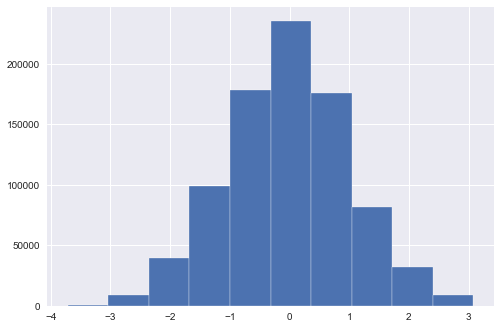

In [6]:
# Distribution of work_reviews_count
df = pd.DataFrame({'work_reviews_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.work_reviews_count, weights=df.weeks_on_list)

(array([  4230.05366507,  29610.37565546, 105751.34162665, 251688.19307142,
        344749.37370287, 289758.67605701, 172374.68685143,  56048.21106212,
         12690.1609952 ,   2115.02683253]),
 array([-3.31868361, -2.62715348, -1.93562334, -1.24409321, -0.55256307,
         0.13896706,  0.8304972 ,  1.52202733,  2.21355747,  2.9050876 ,
         3.59661774]),
 <a list of 10 Patch objects>)

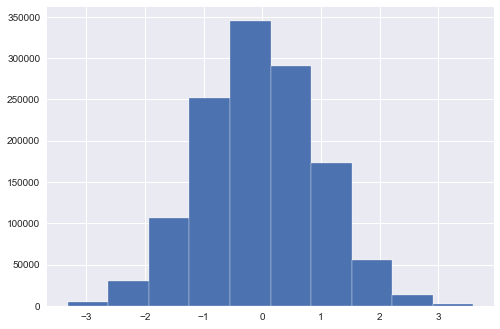

In [7]:
# Distribution of work_ratings_count
df = pd.DataFrame({'work_ratings_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.work_ratings_count, weights=df.weeks_on_list)

(array([  6401.76299005,  21034.36411016,  71333.93046055, 157300.46204121,
        236865.23063183, 279848.49642216, 173762.13830134,  96026.44485074,
         42983.26579033,  11888.98841009]),
 array([-3.15778794, -2.54932363, -1.94085932, -1.33239501, -0.7239307 ,
        -0.11546639,  0.49299791,  1.10146222,  1.70992653,  2.31839084,
         2.92685515]),
 <a list of 10 Patch objects>)

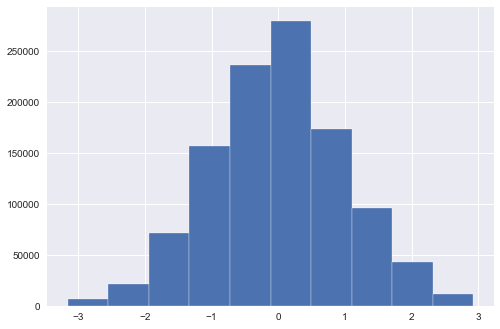

In [8]:
# Distribution of text_reviews_count
df = pd.DataFrame({'text_reviews_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.text_reviews_count, weights=df.weeks_on_list)

(array([  2481.87977114,  13029.8687985 ,  52739.94513677,  98034.25096012,
        196688.97186302, 180556.75335059, 127196.33827104,  53360.41507956,
         18614.09828357,   1861.40982836]),
 array([-3.33973444, -2.68019341, -2.02065237, -1.36111133, -0.7015703 ,
        -0.04202926,  0.61751177,  1.27705281,  1.93659385,  2.59613488,
         3.25567592]),
 <a list of 10 Patch objects>)

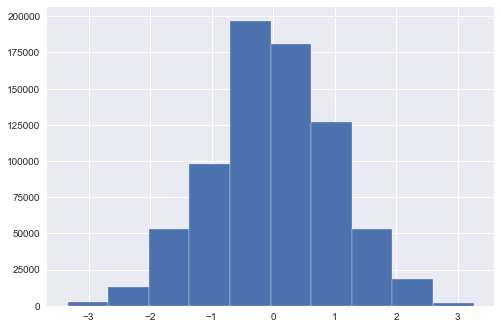

In [9]:
# Distribution of ratings_count
df = pd.DataFrame({'ratings_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.ratings_count, weights=df.weeks_on_list)

(array([   516.68167201,   1033.36334401,   9300.27009613,  52701.53054473,
        100752.92604139, 160171.3183222 , 167921.54340231,  81635.70417712,
         36167.7170405 ,   9816.95176814]),
 array([-4.12178985, -3.42282717, -2.72386449, -2.02490181, -1.32593913,
        -0.62697645,  0.07198623,  0.77094891,  1.46991158,  2.16887426,
         2.86783694]),
 <a list of 10 Patch objects>)

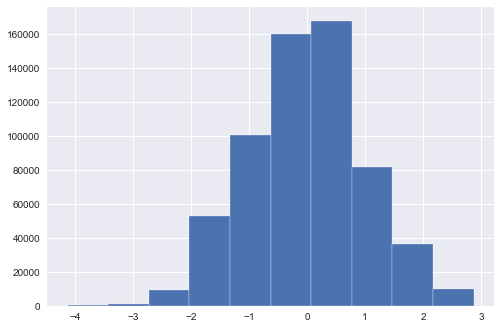

In [10]:
# Distribution of reviews_count
df = pd.DataFrame({'reviews_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.reviews_count, weights=df.weeks_on_list)

### Average Rating and Number of Words in Title

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002133F0DA908>,
      dtype=object)

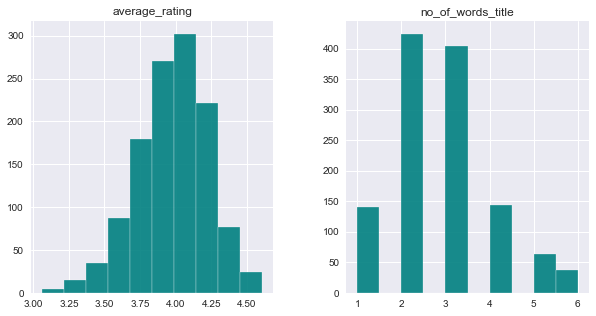

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
df_merge[['average_rating','no_of_words_title']].hist(bins=10, color='teal', alpha=0.9, ax=ax)

### Top 20 Publishers with the most best selling books

In [12]:
publisher_list = df_merge['publisher'].to_list()

In [13]:
publisher_list

["St. Martin's",
 'Ballantine',
 'Grand Central',
 'Harper',
 'Scribner',
 'Grand Central',
 'Grand Central',
 'Delacorte',
 'Doubleday',
 'Grand Central',
 'Riverhead',
 'Sarah Crichton/Farrar, Straus & Giroux',
 'Delacorte Press',
 'Grand Central',
 'Grand Central',
 'Delacorte',
 'Berkley',
 'Grand Central',
 'Little, Brown',
 'Grand Central',
 'Putnam',
 'Knopf',
 'Knopf Doubleday',
 'Vintage',
 'Viking',
 'Flatiron',
 'Grand Central',
 'Delacorte',
 'Grand Central',
 'Grand Central',
 'Little, Brown',
 "St. Martin's",
 'Algonquin',
 'Grand Central',
 'Bantam',
 'Random House',
 'Picador',
 'Scribner',
 'Delacorte',
 'Broadway',
 'Little, Brown & Company',
 'Random House Publishing',
 'Grand Central',
 'Little, Brown',
 'Little, Brown',
 'Little, Brown',
 'Little, Brown',
 'Little, Brown',
 'Scribner',
 'Scribner',
 'Little, Brown',
 'Little, Brown',
 'Little, Brown & Company',
 'Putnam',
 'Little, Brown',
 'Delacorte',
 'Putnam',
 'Simon & Schuster',
 'Little, Brown',
 'Little, Br

In [14]:
# Convert any of the iterable to sequence of iterable publishers with dintinct publishers
unique_publishers = set(publisher_list)

In [15]:
# Count the number of books for each publisher
num_publisher = {}
for publisher in unique_publishers:
    num_publisher[publisher] = publisher_list.count(publisher)
    
num_publisher

{'Vintage Crime/Black Lizard': 1,
 'Lucasbooks': 1,
 'Kensington': 8,
 'Witness Impulse': 4,
 'Carina': 1,
 'Henry Holt & Company': 1,
 'Bloomsbury': 1,
 'Center Street': 3,
 'Spiegel & Grau': 1,
 'New American Library': 1,
 'Howard Books': 5,
 'Dell': 4,
 'Little, Brown & Company': 14,
 'Orbit': 5,
 'Norton': 1,
 'Mira': 20,
 'Picador': 1,
 'HarperCollins': 21,
 'Hyperion Press': 3,
 'Riverhead': 4,
 'Romig Works': 1,
 'Henry Holt': 1,
 'Knopf': 18,
 'Tor': 3,
 'Scout': 1,
 'Doubleday': 10,
 'MIRA': 2,
 'Harper': 22,
 'Grand Central Publishing': 19,
 'Morrow': 25,
 'Liliana Hart': 1,
 'Penguin': 2,
 'Penguin Group': 19,
 'Atria': 21,
 'Scribner': 18,
 'Farrar, Straus & Giroux': 5,
 'Ballatine': 1,
 'Ilona Andrews': 1,
 'Bantam': 25,
 'Doherty': 1,
 'Houghton Mifflin Harcourt': 3,
 'Vision': 1,
 "Knopf/McSweeney's": 1,
 'Kathleen Brooks': 1,
 'Roc': 1,
 'Grand Central': 59,
 'Zondervan': 4,
 'Dial': 3,
 'Forge': 1,
 'Forever/Grand Central': 1,
 'Tor/Tom Doherty': 4,
 'Atria/Keywords': 

In [16]:
# Sort the publisher list from the highest to the lowest number of books
num_publisher = {k: v for k, v in sorted(num_publisher.items(), key=lambda item: item[1], 
                                         reverse=True)}

In [17]:
# Review the list
num_publisher

{'Simon & Schuster': 67,
 'Little, Brown': 65,
 'Grand Central': 59,
 "St. Martin's": 54,
 'Putnam': 46,
 'Random House': 41,
 'Random House Publishing': 40,
 'Harlequin': 38,
 'Delacorte': 36,
 'Morrow/HarperCollins': 33,
 'Ballantine': 32,
 'HarperCollins Publishers': 30,
 'Avon': 29,
 'Morrow': 25,
 'Bantam': 25,
 'Harper': 22,
 'HarperCollins': 21,
 'Atria': 21,
 'Mira': 20,
 'HQN': 20,
 'Grand Central Publishing': 19,
 'Penguin Group': 19,
 'Berkley': 19,
 "St. Martin's Press": 19,
 'Knopf': 18,
 'Scribner': 18,
 'Del Rey': 15,
 'Little, Brown & Company': 14,
 'Minotaur': 13,
 'Zebra': 12,
 'Gallery': 11,
 'Touchstone': 11,
 'Doubleday': 10,
 'Knopf Doubleday': 10,
 'Dutton': 9,
 'Gallery Books': 9,
 'Knopf Doubleday Publishing': 9,
 'Kensington': 8,
 'Viking': 7,
 'Ace': 7,
 'Harlequin Mira': 6,
 'BookShots': 6,
 'Emily Bestler/Atria': 6,
 'Howard Books': 5,
 'Orbit': 5,
 'Farrar, Straus & Giroux': 5,
 'Vintage': 5,
 "St. Martin's Griffin": 5,
 'Harper/HarperCollins': 5,
 'Foreve

In [18]:
# Make another list with Top 20 publishers with the higest number of best selling books
publisher_20 = dict(itertools.islice(num_publisher.items(), 20))

In [19]:
publisher_20

{'Simon & Schuster': 67,
 'Little, Brown': 65,
 'Grand Central': 59,
 "St. Martin's": 54,
 'Putnam': 46,
 'Random House': 41,
 'Random House Publishing': 40,
 'Harlequin': 38,
 'Delacorte': 36,
 'Morrow/HarperCollins': 33,
 'Ballantine': 32,
 'HarperCollins Publishers': 30,
 'Avon': 29,
 'Morrow': 25,
 'Bantam': 25,
 'Harper': 22,
 'HarperCollins': 21,
 'Atria': 21,
 'Mira': 20,
 'HQN': 20}

In [20]:
# Make 2 lists for name of publishers and number of books
publishers = []
counts = []

for publisher, count in publisher_20.items():
    publishers.append(publisher)
    counts.append(count)

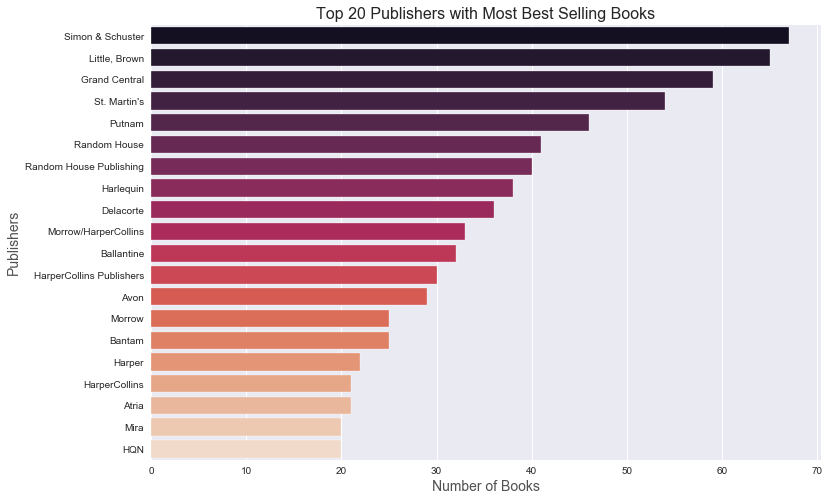

In [21]:
# Graph to see the trend
plt.figure(figsize=(12, 8))
gr1 = sns.barplot(x=counts, y=publishers,
                  ci=None, palette='rocket')
gr1.set_xlabel('Number of Books', fontsize=14, alpha=0.8)
gr1.set_ylabel('Publishers', fontsize=14, alpha=0.8)
gr1.set_title('Top 20 Publishers with Most Best Selling Books', fontsize=16)
plt.show()

### Top 20 Authors with the most best selling books

In [22]:
author_list = df_merge['author'].to_list()

In [23]:
# Convert any of the iterable to sequence of iterable authors with dintinct authors
unique_authors = set(author_list)

In [24]:
# Count the number of books for each author
num_author = {}
for author in unique_authors:
    num_author[author] = author_list.count(author)
    
num_author

{'Jim Butcher': 3,
 'James Patterson': 8,
 'Jodi Picoult': 6,
 'Alice Hoffman': 4,
 'Jessica Knoll': 1,
 'Zane': 1,
 'Aaron Allston': 1,
 'E L James': 1,
 'Stephanie Laurens': 3,
 'Lev Grossman': 1,
 'Carl Hiaasen': 1,
 'Jason Matthews': 2,
 'Paulo Coelho': 1,
 'Emma Straub': 1,
 'James Patterson and Richard DiLallo': 1,
 'James Patterson and Emily Raymond': 1,
 'Greg Iles': 3,
 'Abraham Verghese': 1,
 'Louise Erdrich': 2,
 'Mike Maden': 1,
 'J R Ward': 4,
 'Sylvia Day': 3,
 'David Baldacci': 18,
 'James Rollins': 6,
 'Kazuo Ishiguro': 1,
 'Heather Graham': 5,
 'Anthony Ryan': 1,
 'Mary Higgins Clark': 9,
 'Daniel Silva': 5,
 'Umberto Eco': 1,
 'Lisa Kleypas': 5,
 'Alan Dean Foster': 1,
 'Max Brooks': 1,
 'Ian McEwan': 2,
 'Jason Fry': 1,
 'Emily Giffin': 5,
 'Tami Hoag': 2,
 'Nora Roberts': 12,
 'Phil Klay': 1,
 'Patricia Briggs': 4,
 'Jhumpa Lahiri': 1,
 'James Lee Burke': 5,
 'Anne Bishop': 2,
 'James Hayman': 1,
 'Jeffrey Eugenides': 1,
 'Meg Wolitzer': 1,
 'Elizabeth Strout': 3,
 

In [25]:
# Sort the author list from the highest to the lowest number of books
num_author = {k: v for k, v in sorted(num_author.items(), key=lambda item: item[1], 
                                         reverse=True)}

In [26]:
# Review the list
num_author

{'Danielle Steel': 25,
 'Susan Mallery': 20,
 'David Baldacci': 18,
 'Ron Carr': 17,
 'Janet Evanovich': 13,
 'J A Jance': 13,
 'Nora Roberts': 12,
 'Lee Child': 12,
 'Michael Connelly': 12,
 'Debbie Macomber': 12,
 'James Patterson and Maxine Paetro': 11,
 'Linda Lael Miller': 11,
 'Karen Kingsbury': 11,
 'Lisa Scottoline': 11,
 'Iris Johansen': 11,
 'Sandra Brown': 10,
 'Stephen King': 10,
 'Douglas Preston and Lincoln Child': 10,
 'Jill Shalvis': 10,
 'Dean Koontz': 10,
 'Mary Higgins Clark': 9,
 'Fern Michaels': 9,
 'Christina Lauren': 9,
 'Lynsay Sands': 9,
 'John Grisham': 9,
 'Elin Hilderbrand': 9,
 'James Patterson': 8,
 'Dorothea Benton Frank': 8,
 'James Patterson and Michael Ledwidge': 8,
 'Marie Force': 8,
 'Kresley Cole': 8,
 'Philippa Gregory': 8,
 'Kristin Hannah': 8,
 'Richard Paul Evans': 8,
 'Maya Banks': 8,
 'Lisa Jackson': 7,
 'Steve Berry': 7,
 'Tess Gerritsen': 7,
 'Nicholas Sparks': 7,
 'Jodi Picoult': 6,
 'James Rollins': 6,
 'Jeffery Deaver': 6,
 'Jacqueline Wi

In [27]:
# Make another list with Top 20 authors with the higest number of best selling books
author_20 = dict(itertools.islice(num_author.items(), 20))

In [28]:
author_20

{'Danielle Steel': 25,
 'Susan Mallery': 20,
 'David Baldacci': 18,
 'Ron Carr': 17,
 'Janet Evanovich': 13,
 'J A Jance': 13,
 'Nora Roberts': 12,
 'Lee Child': 12,
 'Michael Connelly': 12,
 'Debbie Macomber': 12,
 'James Patterson and Maxine Paetro': 11,
 'Linda Lael Miller': 11,
 'Karen Kingsbury': 11,
 'Lisa Scottoline': 11,
 'Iris Johansen': 11,
 'Sandra Brown': 10,
 'Stephen King': 10,
 'Douglas Preston and Lincoln Child': 10,
 'Jill Shalvis': 10,
 'Dean Koontz': 10}

In [29]:
# Make 2 lists for name of publishers and number of books
authors = []
counts = []

for author, count in author_20.items():
    authors.append(author)
    counts.append(count)

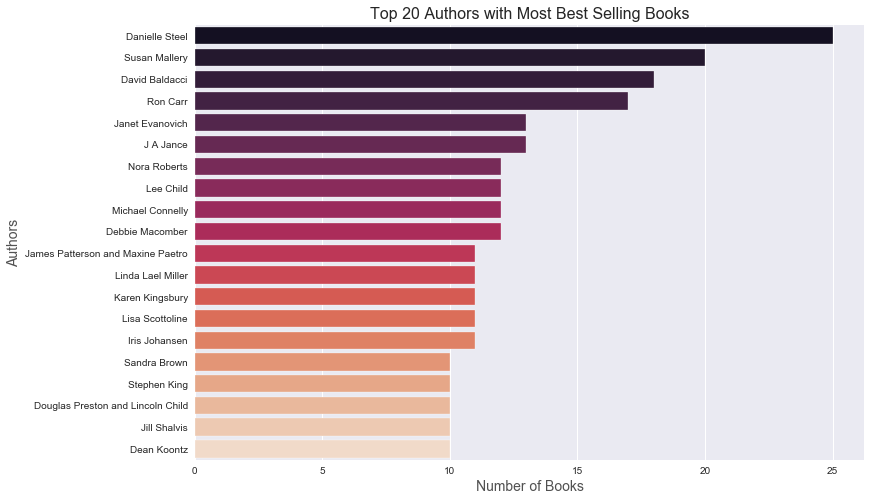

In [30]:
# Graph to see the trend
plt.figure(figsize=(12, 8))
gr2 = sns.barplot(x=counts, y=authors,
                  ci=None, palette='rocket')
gr2.set_xlabel('Number of Books', fontsize=14, alpha=0.8)
gr2.set_ylabel('Authors', fontsize=14, alpha=0.8)
gr2.set_title('Top 20 Authors with Most Best Selling Books', fontsize=16)
plt.show()

### Best Sellers Trend by Years

In [31]:
# Change the format of 'date' column
df_merge['date'] = pd.to_datetime(df_merge['date'])
print(df_merge['date'].dtype)

datetime64[ns]


In [32]:
# Extract the year from 'date' column and put it in a new column 'year'
df_merge['year'] = pd.DatetimeIndex(df_merge['date']).year
df_merge.head()

,publisher,author,isbn,date,title,weeks_on_list,no_of_words_title,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,average_rating,year
0,St. Martin's,Kristin Hannah,125016561X,2018-06-09,THE GREAT ALONE,16,3,151,243,48,363073,778639,36575,4.34,2018
1,Ballantine,Jodi Picoult,034554496X,2017-02-12,SMALL GREAT THINGS,16,3,104,172,35,260815,533873,25170,4.34,2017
2,Grand Central,Nicholas Sparks,1455520691,2017-02-05,TWO BY TWO,16,3,2015,8889,353,66630,163159,5816,3.92,2017
3,Harper,Harper Lee,0062409875,2016-07-10,GO SET A WATCHMAN,16,4,54,96,17,229380,575055,29495,3.31,2016
4,Scribner,Stephen King,1501175467,2017-12-10,IT,15,1,1333,2982,190,789789,1398689,25068,4.24,2017


In [33]:
yr_list = df_merge['year'].to_list()

In [34]:
# Convert any of the iterable to sequence of iterable years with dintinct years
unique_yrs = set(yr_list)

In [35]:
# Count the number of books for each year
num_yr = {}
for yr in unique_yrs:
    num_yr[yr] = yr_list.count(yr)

In [36]:
# Sort the year list in order of 2011 to 2018
num_yr = dict(sorted(list(num_yr.items())))
num_yr

{2011: 143,
 2012: 137,
 2013: 131,
 2014: 142,
 2015: 172,
 2016: 248,
 2017: 169,
 2018: 73}

In [37]:
# Make 2 lists for years and number of books
yrs = []
counts = []

for yr, count in num_yr.items():
    yrs.append(yr)
    counts.append(count)

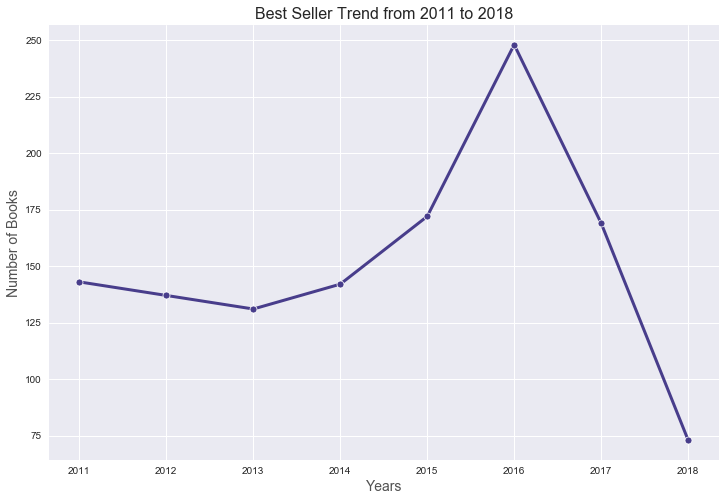

In [38]:
# Graph to see the trend
plt.figure(figsize=(12, 8))
gr3 = sns.lineplot(yrs, counts, ci=None, marker='o', color='darkslateblue', linewidth=3)
gr3.set_ylabel('Number of Books', fontsize=14, alpha=0.8)
gr3.set_xlabel('Years', fontsize=14, alpha=0.8)
gr3.set_title('Best Seller Trend from 2011 to 2018', fontsize=16)
plt.show()

In [39]:
df_merge = df_merge.drop('year', axis=1)

In [40]:
df_merge['weeks_on_list'].value_counts(normalize=True)

1     0.426337
0     0.386831
2     0.052675
4     0.030453
3     0.025514
6     0.017284
5     0.017284
8     0.010700
7     0.007407
9     0.006584
10    0.004938
16    0.003292
15    0.002469
13    0.002469
14    0.002469
11    0.001646
12    0.001646
Name: weeks_on_list, dtype: float64

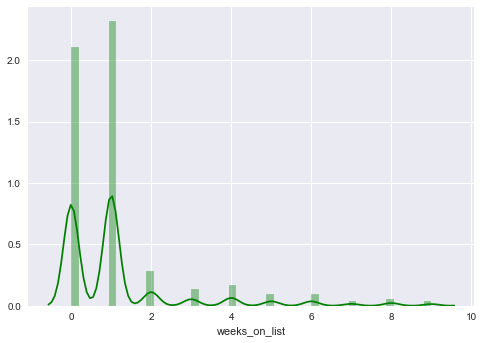

In [41]:
df1 = df_merge.loc[(df_merge['weeks_on_list'] < 10)].copy()
sns.distplot(df1['weeks_on_list'], kde=True, color="green")

# Explore the relationships between variables

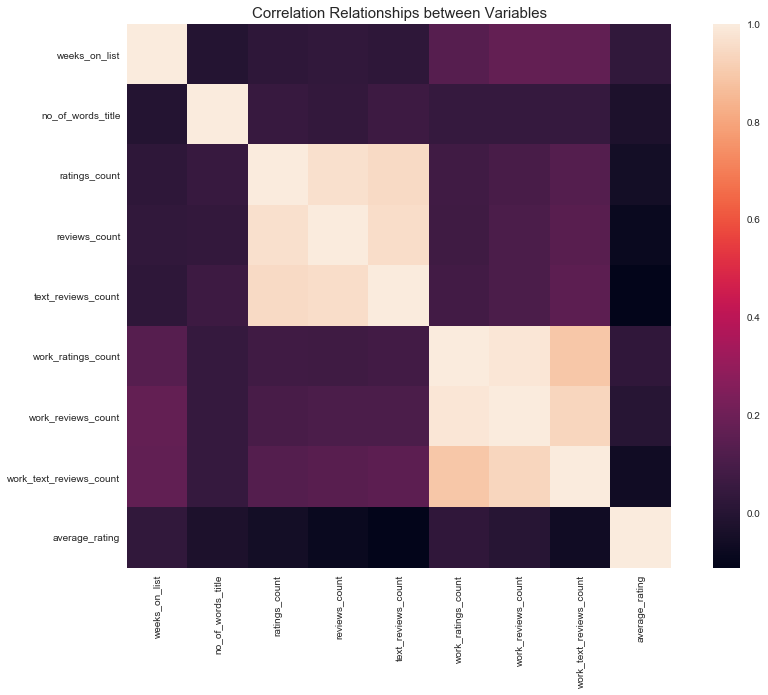

In [42]:
corr = df_merge.corr()
f, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr, vmax=1., square=True)
plt.title('Correlation Relationships between Variables', fontsize=15)
plt.show()

In [43]:
# Calculate correlation of each feature to 'weeks_on_list' and sort in descending order
corr = df_merge.corr()
corr = corr.stack().reset_index()
corr = corr.rename(columns = {'level_0':'Target', 'level_1':'Features', 0:'Correlation_Values'})
corr = corr.loc[corr['Target'] == 'weeks_on_list']
corr.sort_values(by = 'Correlation_Values', ascending = False)

,Target,Features,Correlation_Values
0,weeks_on_list,weeks_on_list,1.000000
6,weeks_on_list,work_reviews_count,0.172599
7,weeks_on_list,work_text_reviews_count,0.170374
5,weeks_on_list,work_ratings_count,0.140125
3,weeks_on_list,reviews_count,0.036516
8,weeks_on_list,average_rating,0.034154
4,weeks_on_list,text_reviews_count,0.028046
2,weeks_on_list,ratings_count,0.026009
1,weeks_on_list,no_of_words_title,-0.004164


# Deal with Categorical Features

The categorical features in this dataset are not ordinal. In addition, the numbers of categories in these features are quite large. Therefore, we cannot use Label Encoding and One Hot Encoding as these two methods require that the categorical feature is ordinal (Label Encoding) and the number of categories is small (One Hot Encoding).

In [44]:
# Categorical features
cat_feats = ['publisher', 'author']

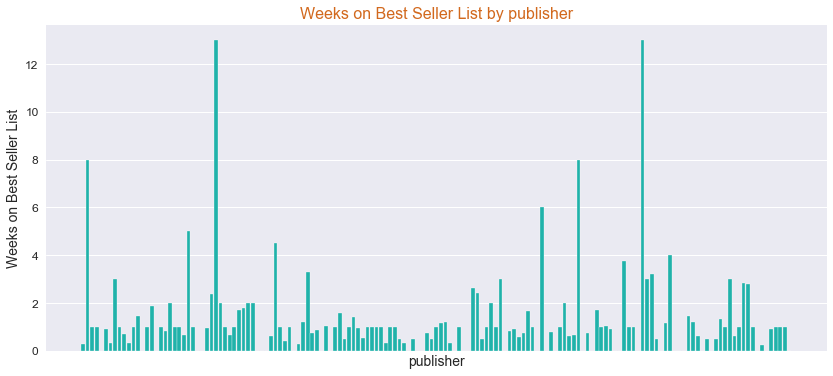

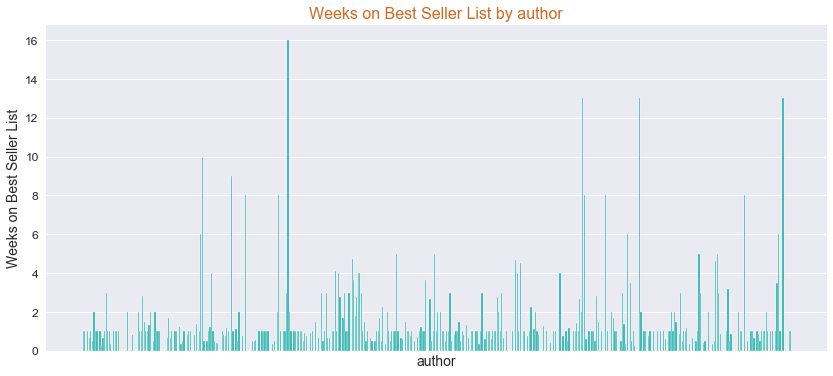

In [45]:
def visualize_influence(feature_list):
    for feature in feature_list:
        df_plot = df_merge.groupby([feature])['weeks_on_list'].mean().reset_index()
        x = df_plot[feature]
        y = df_plot['weeks_on_list']
        plt.figure(figsize=(14, 6))
        plt.bar(x, y, color='lightseagreen')
        plt.xlabel(feature, fontsize=14)
        plt.ylabel('Weeks on Best Seller List', fontsize=14)
        plt.title(f'Weeks on Best Seller List by {feature}', fontsize=16, color='chocolate')
        plt.xticks([])
        plt.yticks(fontsize=12)
        plt.show();
        
visualize_influence(cat_feats)

In [46]:
# Get dummies variables for 'publisher' and 'author'
df_merge = pd.concat([df_merge, pd.get_dummies(df_merge['publisher'], prefix='dummy')], axis=1)
df_merge = pd.concat([df_merge, pd.get_dummies(df_merge['author'], prefix='dummy')], axis=1)
df_merge.drop(['publisher', 'author'], axis=1, inplace=True)
df_merge.head()

,isbn,date,title,weeks_on_list,no_of_words_title,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,...,dummy_Vince Flynn,dummy_Vince Flynn and Kyle Mills,dummy_Wiley Cash,dummy_William Kent Krueger,dummy_William Landay,dummy_William R Forstchen,dummy_Wm Paul Young,dummy_Zadie Smith,dummy_Zane,dummy_ï»¿Imbolo Mbue
0,125016561X,2018-06-09,THE GREAT ALONE,16,3,151,243,48,363073,778639,...,0,0,0,0,0,0,0,0,0,0
1,034554496X,2017-02-12,SMALL GREAT THINGS,16,3,104,172,35,260815,533873,...,0,0,0,0,0,0,0,0,0,0
2,1455520691,2017-02-05,TWO BY TWO,16,3,2015,8889,353,66630,163159,...,0,0,0,0,0,0,0,0,0,0
3,0062409875,2016-07-10,GO SET A WATCHMAN,16,4,54,96,17,229380,575055,...,0,0,0,0,0,0,0,0,0,0
4,1501175467,2017-12-10,IT,15,1,1333,2982,190,789789,1398689,...,0,0,0,0,0,0,0,0,0,0


# Scale Continuous Features with StandardScaler

* Standardization maintains outliers (do you see why?) whereas normalization makes outliers less obvious. In applications where outliers are useful, standardization should be done.
* StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

In [47]:
con_feats = ['no_of_words_title','ratings_count','reviews_count','text_reviews_count',
             'work_ratings_count','work_reviews_count','work_text_reviews_count','average_rating']

In [48]:
ss = StandardScaler()
scaled = ss.fit_transform(df_merge[con_feats])
scaled = pd.DataFrame(scaled, columns=con_feats)

In [49]:
# Drop the original values and merge the scaled values for continuous columns
df1 = df_merge.drop(columns=con_feats, axis = 1)
df1 = df1.merge(scaled, left_index=True, right_index=True, how = "left")
df1.head()

,isbn,date,title,weeks_on_list,dummy_Ace,dummy_Algonquin,dummy_Anchor,dummy_Atlantic Monthly,dummy_Atlantic Monthly Press,dummy_Atria,...,dummy_Zane,dummy_ï»¿Imbolo Mbue,no_of_words_title,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,average_rating
0,125016561X,2018-06-09,THE GREAT ALONE,16,0,0,0,0,0,0,...,0,0,0.226300,-0.303579,-0.314999,-0.297325,3.479200,4.409219,5.759050,1.446930
1,034554496X,2017-02-12,SMALL GREAT THINGS,16,0,0,0,0,0,0,...,0,0,0.226300,-0.307542,-0.317904,-0.308624,2.361343,2.854072,3.776326,1.446930
2,1455520691,2017-02-05,TWO BY TWO,16,0,0,0,0,0,0,...,0,0,0.226300,-0.146402,0.038760,-0.032241,0.238564,0.498700,0.411692,-0.226009
3,0062409875,2016-07-10,GO SET A WATCHMAN,16,0,0,0,0,0,0,...,0,0,1.085531,-0.311758,-0.321013,-0.324268,2.017704,3.115726,4.528214,-2.655753
4,1501175467,2017-12-10,IT,15,0,0,0,0,0,0,...,0,0,-1.492163,-0.203910,-0.202930,-0.173909,8.143946,8.348774,3.758594,1.048611


# Drop unnecessary columns for modeling 

In [50]:
df1 = df1.drop(columns=['isbn','date','title'], axis=1)

# Statsmodel's Ordinary Least Squares (OLS)

In [51]:
# Define features X and target y
y = df1['weeks_on_list']
X = df1.drop('weeks_on_list', axis=1)

# Define the intercept
X = sm.add_constant(X)

# Fit a model
model = sm.OLS(y, X)
result = model.fit()

# Summarize results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          weeks_on_list   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     1.444
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           3.05e-06
Time:                        14:58:59   Log-Likelihood:                -2239.0
No. Observations:                1215   AIC:                             5630.
Df Residuals:                     639   BIC:                             8569.
Df Model:                         575                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.6657      0.207      3.211      0.001       0.259       1.073
dummy_Ace                                       -0.4535      1.895     -0.239      0.811      -4.175       3.268
dummy_Algonquin                                  0.3171      1.148      0.276      0.783      -1.938       2.572
dummy_Anchor                                     1.5543      2.603      0.597      0.551      -3.556       6.665
dummy_Atlantic Monthly                           0.5352      0.999      0.536      0.592      -1.427       2.498
dummy_Atlantic Monthly Press                    -0.1139      1.449     -0.079      0.937      -2.960       2.732
dummy_Atria                                      0.7930      1.475      0.538      0.591      -2.103       3.689
dummy_Atria Books                               -0.0217      1.717     -0.013      0.990      -3.394       3.351
dummy_Atria/Emily Bestler                       -2.6490      1.914     -1.384      0.167      -6.408       1.110
dummy_Atria/Keywords                             0.9594      1.069      0.898      0.370      -1.139       3.058
dummy_Avon                                      -0.4284      0.774     -0.553      0.580      -1.949       1.092
dummy_Avon Impulse                              -0.7041      1.448     -0.486      0.627      -3.548       2.140
dummy_Avon/HarperCollins                         0.1263      1.326      0.095      0.924      -2.478       2.731
dummy_Ballantine                                 0.4305      0.745      0.578      0.563      -1.031       1.893
dummy_Ballatine                                 -1.0342      2.362     -0.438      0.662      -5.672       3.603
dummy_Bantam                                    -0.1418      0.873     -0.162      0.871      -1.856       1.572
dummy_Berkley                                   -0.3777      0.992     -0.381      0.703      -2.325       1.570
dummy_Bethany House                             -0.2081      1.064     -0.196      0.845      -2.297       1.881
dummy_Bloomsbury                                -0.6009      1.062     -0.566      0.572      -2.687       1.485
dummy_BookShots                                 -1.6119      2.306     -0.699      0.485      -6.141       2.917
dummy_Broadway                                  -2.4327      1.080     -2.252      0.025      -4.554      -0.312
dummy_Carina                                     1.5567      2.651      0.587      0.557      -3.648       6.762
dummy_Carina Press                               1.6431      2.650      0.620      0.535      -3.561       6.847
dummy_Center Street                             -2.4679      2.413     -1.023      0.307      -7.206       2.270
dummy_Crown                     

# Features and Targets: Convert Data to Arrays

In [52]:
# Target is the value we want to predict
target = np.array(df1['weeks_on_list'])
# Remove the target from the features
features = df1.drop('weeks_on_list', axis = 1)
# Saving feature names for later use
feat_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# GridSearchCV

In [53]:
def rfr_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={'max_depth': range(3,7),
                    'n_estimators': (10, 50, 100, 1000)},
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_   
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
   # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')
    return scores

# Train-Test Split 

Features X and target y

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor Model

In [55]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);

In [56]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.05 degrees.


In [57]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape[np.isfinite(mape)])
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 60.58 %.


In [58]:
# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_test.values.ravel(), predictions)

print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Squared Error: 3.25
R-squared scores: 0.03


In [59]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feat_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:15} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: work_text_reviews_count Importance: 0.09
Variable: average_rating  Importance: 0.09
Variable: work_reviews_count Importance: 0.07
Variable: dummy_David Lagercrantz Importance: 0.06
Variable: text_reviews_count Importance: 0.05
Variable: work_ratings_count Importance: 0.05
Variable: reviews_count   Importance: 0.04
Variable: dummy_Grand Central Publishing Importance: 0.03
Variable: dummy_Hazel Gaynor Importance: 0.03
Variable: dummy_Lene Kaaberbol Importance: 0.03
Variable: dummy_Noah Hawley Importance: 0.02
Variable: ratings_count   Importance: 0.02
Variable: dummy_Ballatine Importance: 0.01
Variable: dummy_Dell      Importance: 0.01
Variable: dummy_Little, Brown & Company Importance: 0.01
Variable: dummy_Scout     Importance: 0.01
Variable: dummy_Vintage   Importance: 0.01
Variable: dummy_David Mitchell Importance: 0.01
Variable: dummy_Emma Donoghue Importance: 0.01
Variable: dummy_James Patterson and Ashwin Sanghi Importance: 0.01
Variable: dummy_James Patterson and Marshal

### Random Forest Model with only 2 Most Important Features

In [60]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feat_list.index('work_text_reviews_count'), feat_list.index('average_rating')]
train_important = X_train.iloc[:, important_indices]
test_important = X_test.iloc[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, y_train)
# Make predictions and determine the error
predictions_2 = rf_most_important.predict(test_important)
errors_2 = abs(predictions_2 - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors_2), 2), 'degrees.')
mape_2 = 100 * (errors_2 / y_test)
accuracy_2 = 100 - np.mean(mape_2[np.isfinite(mape_2)])
print('Accuracy:', round(accuracy_2, 2), '%.')

Mean Absolute Error: 1.36 degrees.
Accuracy: 35.23 %.


In [61]:
# Mean squared error (MSE)
mse_2 = mean_squared_error(y_test.values.ravel(), predictions_2)

# R-squared scores
r2_2 = r2_score(y_test.values.ravel(), predictions_2)

print('Mean Squared Error:', round(mse_2, 2))
print('R-squared scores:', round(r2_2, 2))

Mean Squared Error: 4.59
R-squared scores: -0.38
